In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tube1 = pd.read_csv('tube1.csv')
tube2 = pd.read_csv('tube2.csv')
tube3 = pd.read_csv('tube3.csv')
tube4 = pd.read_csv('tube4.csv')
tube5 = pd.read_csv('tube5.csv')




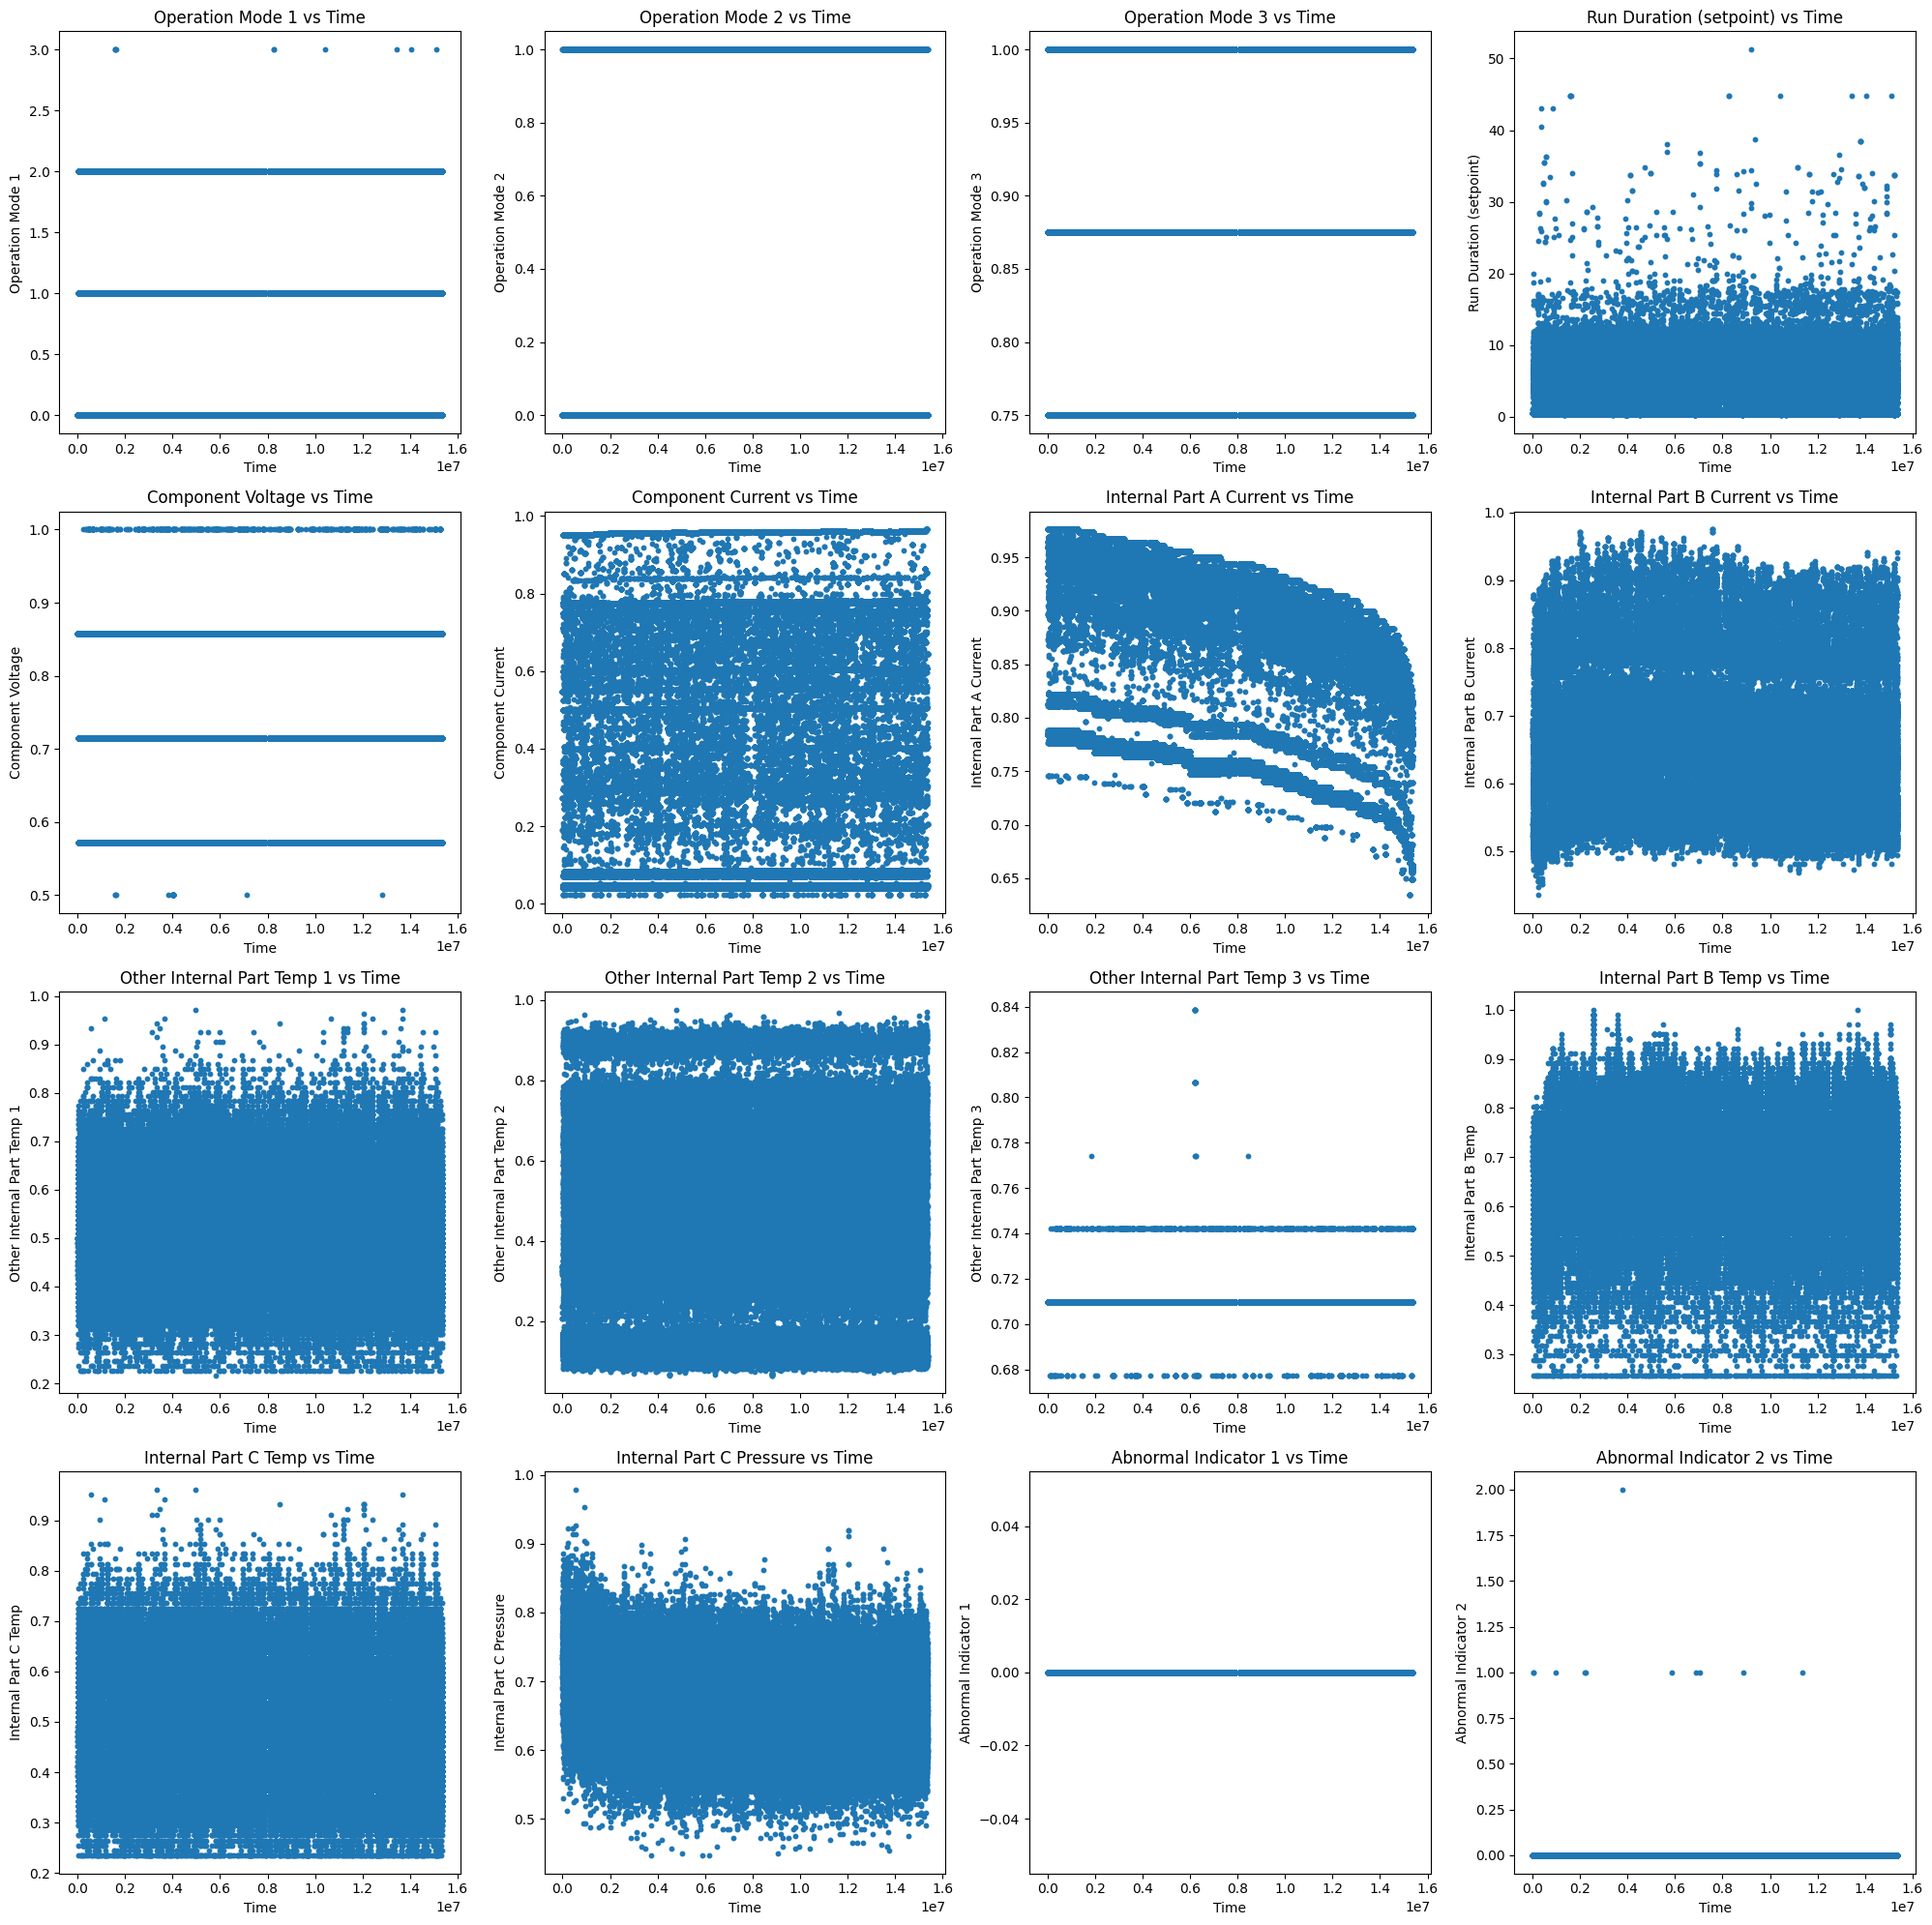

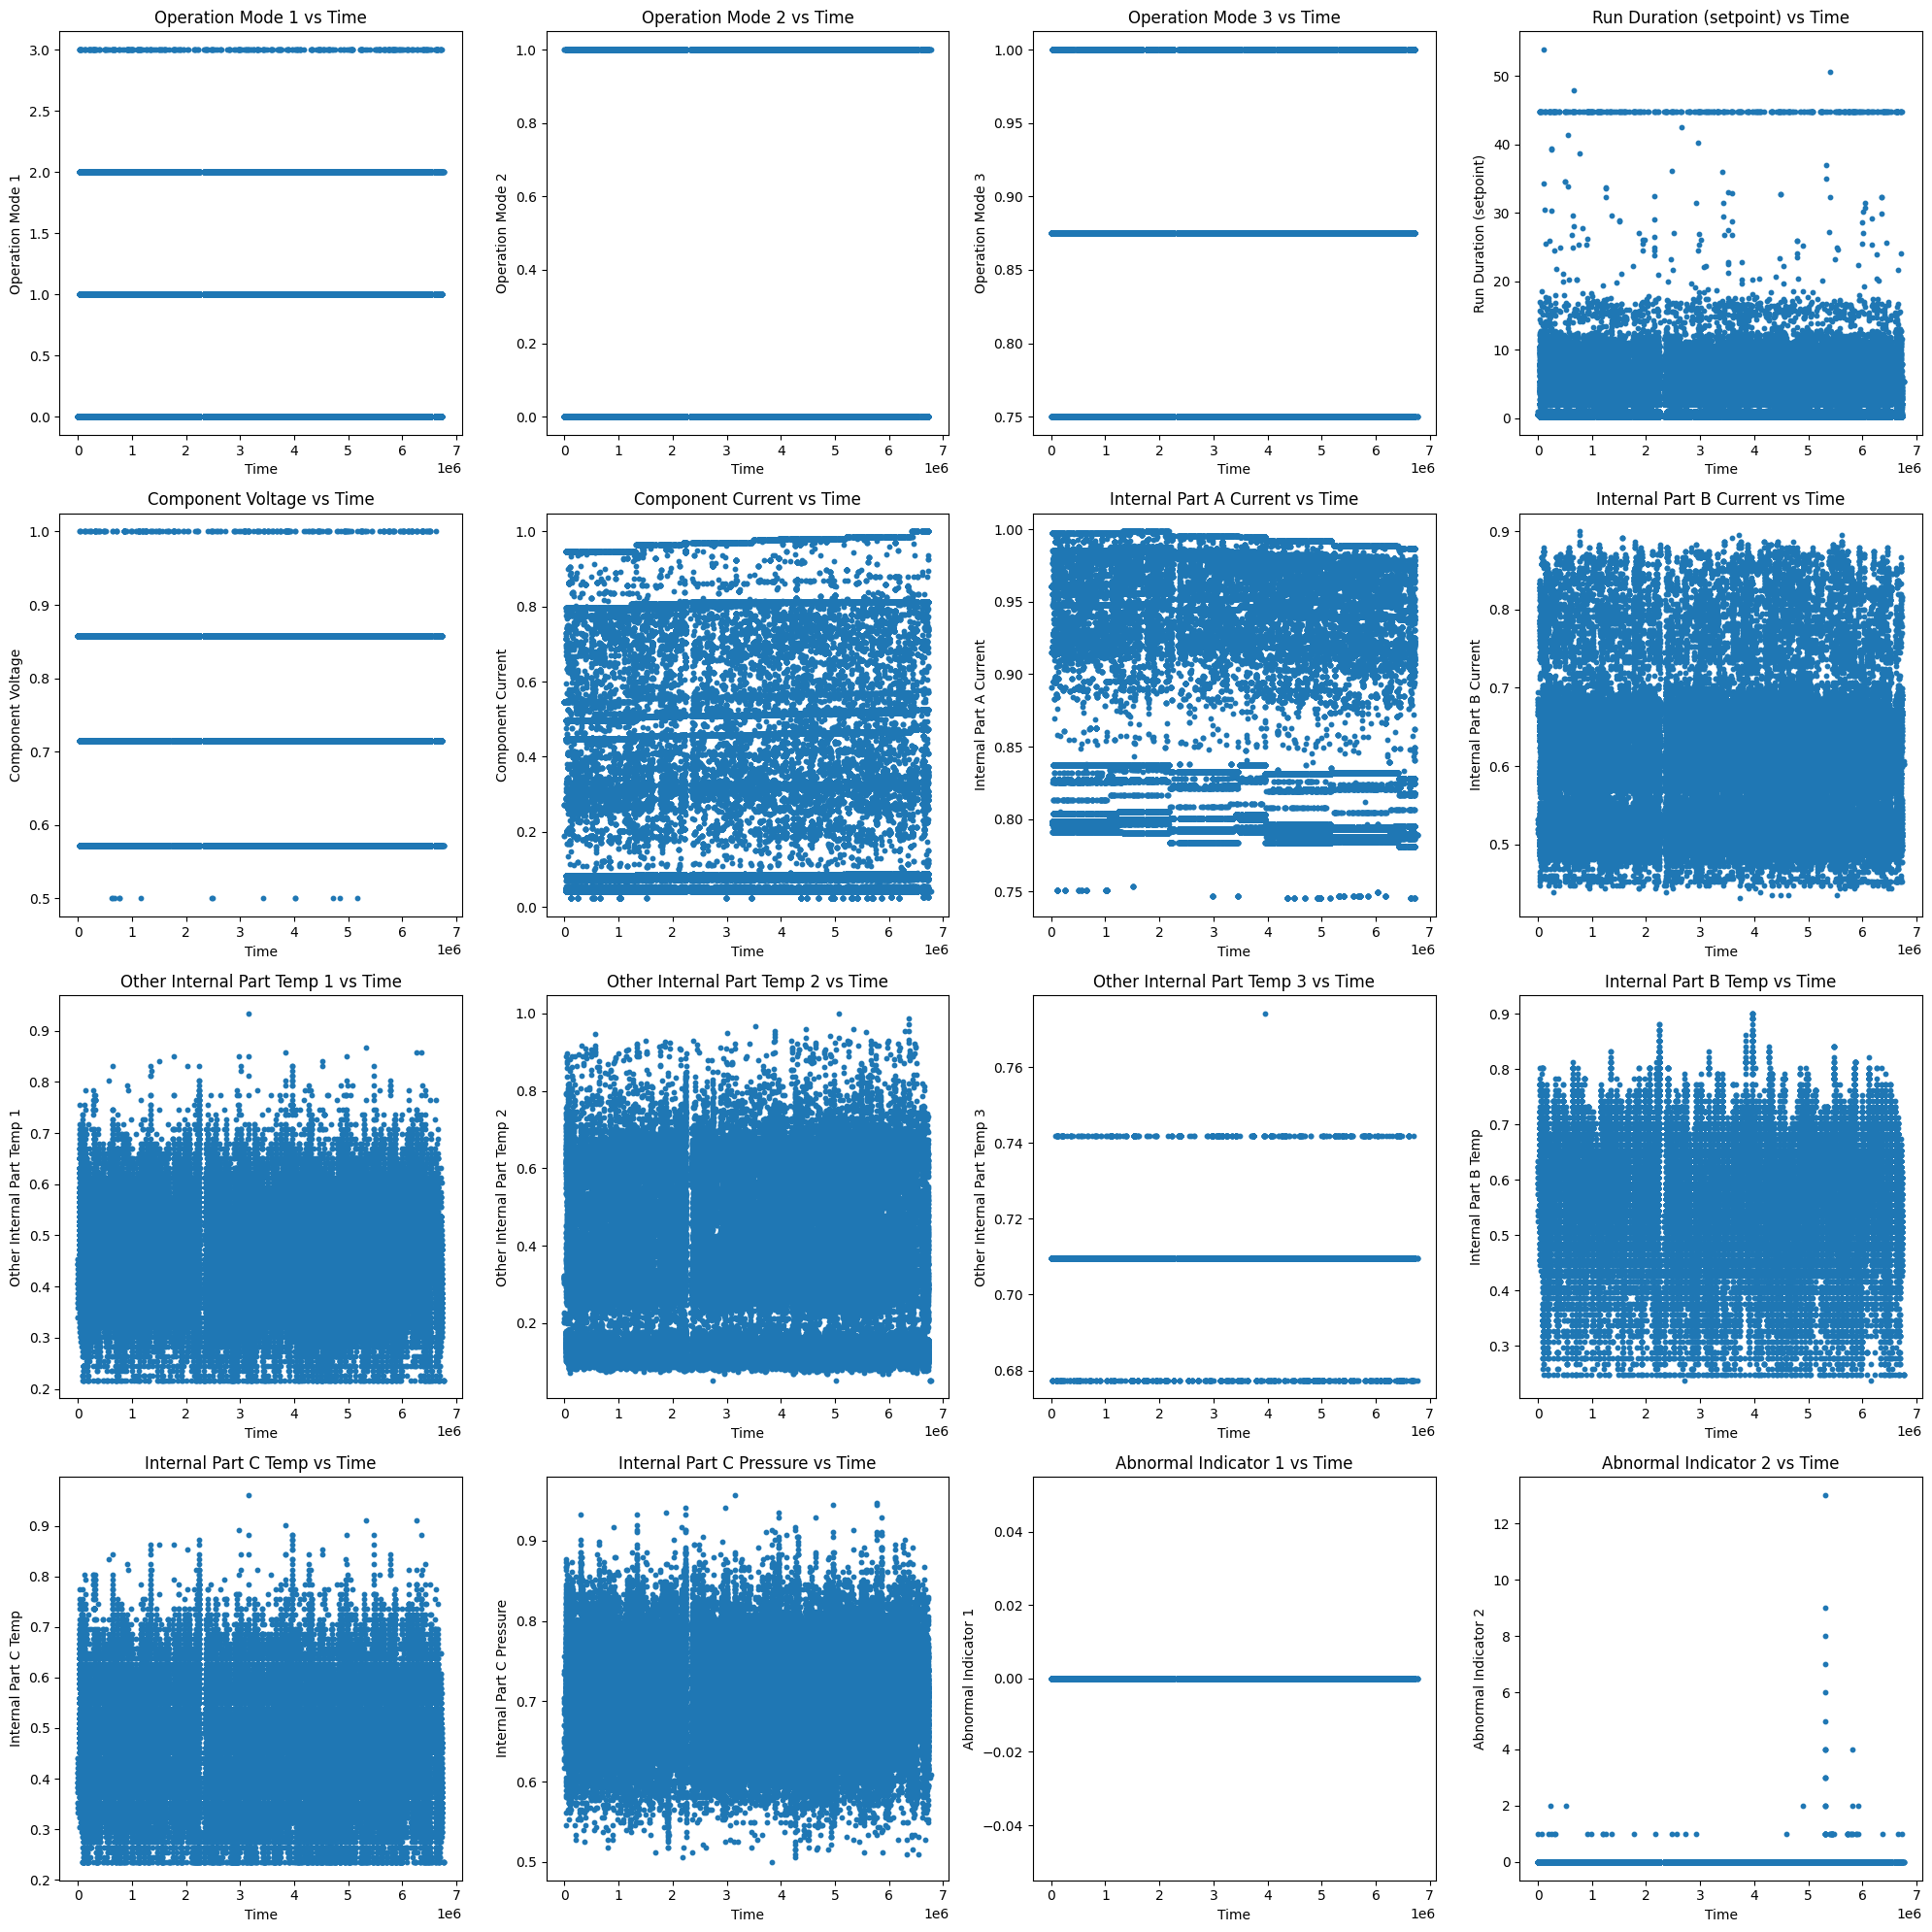

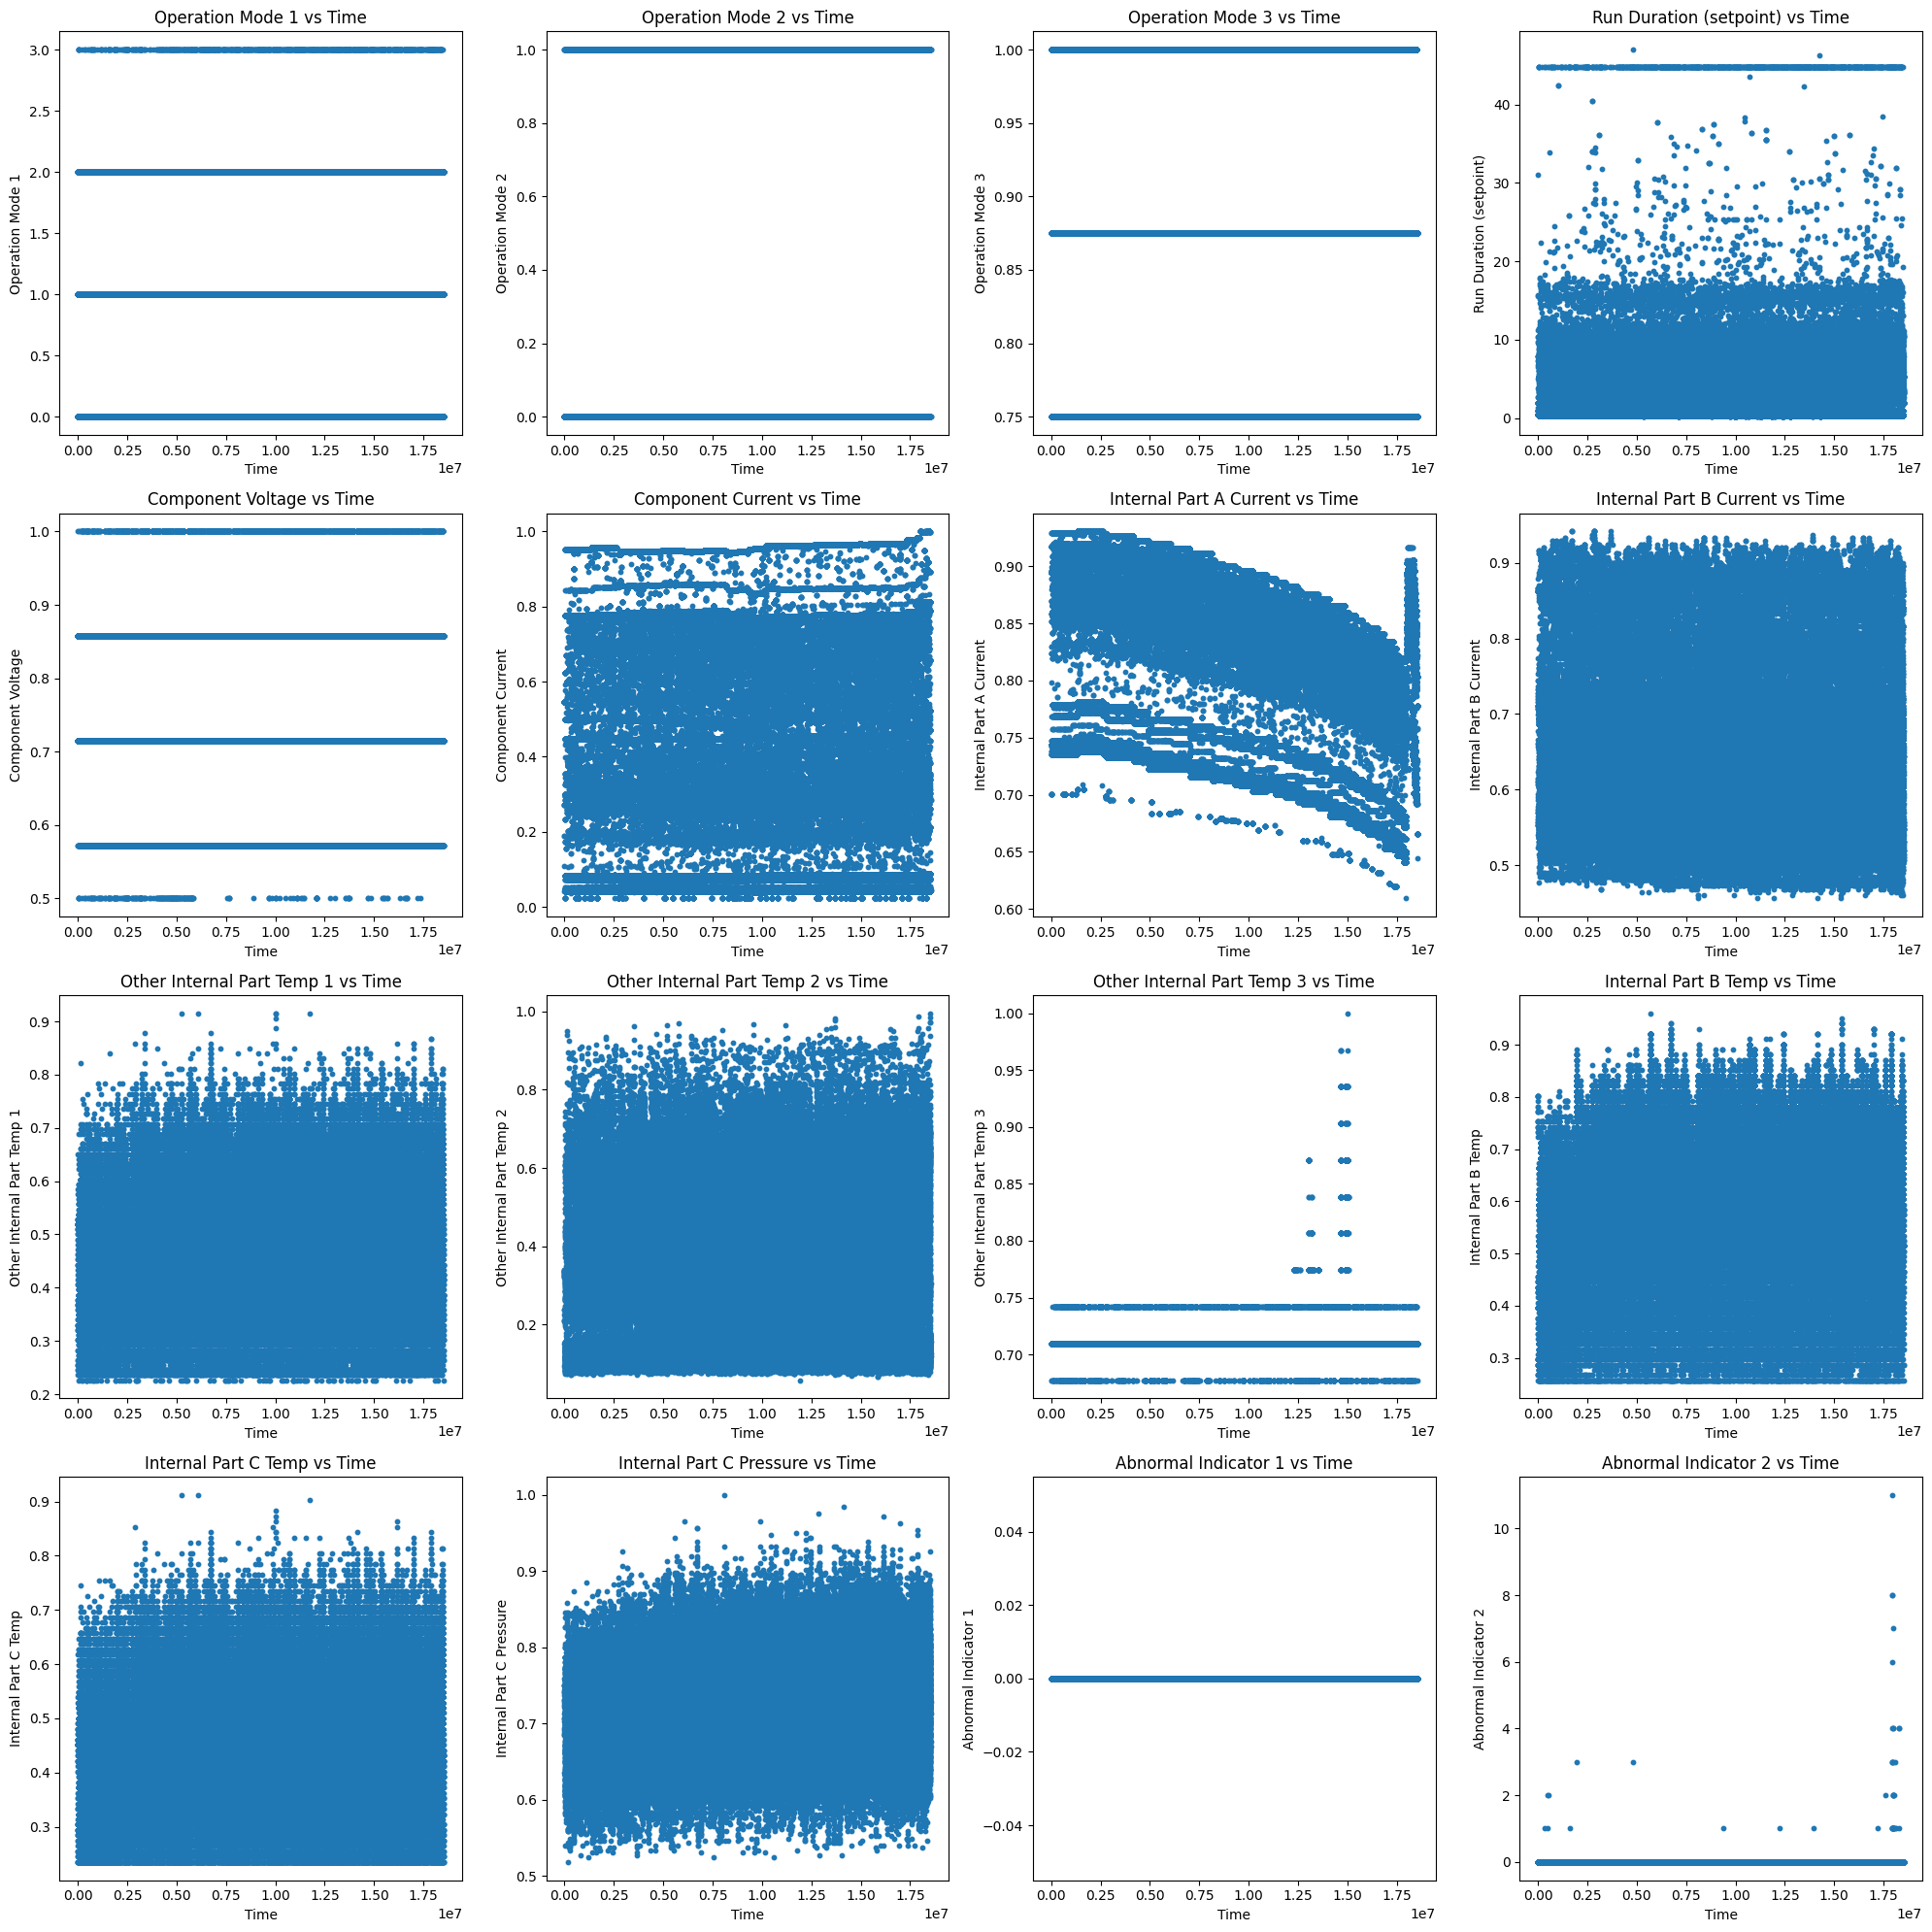

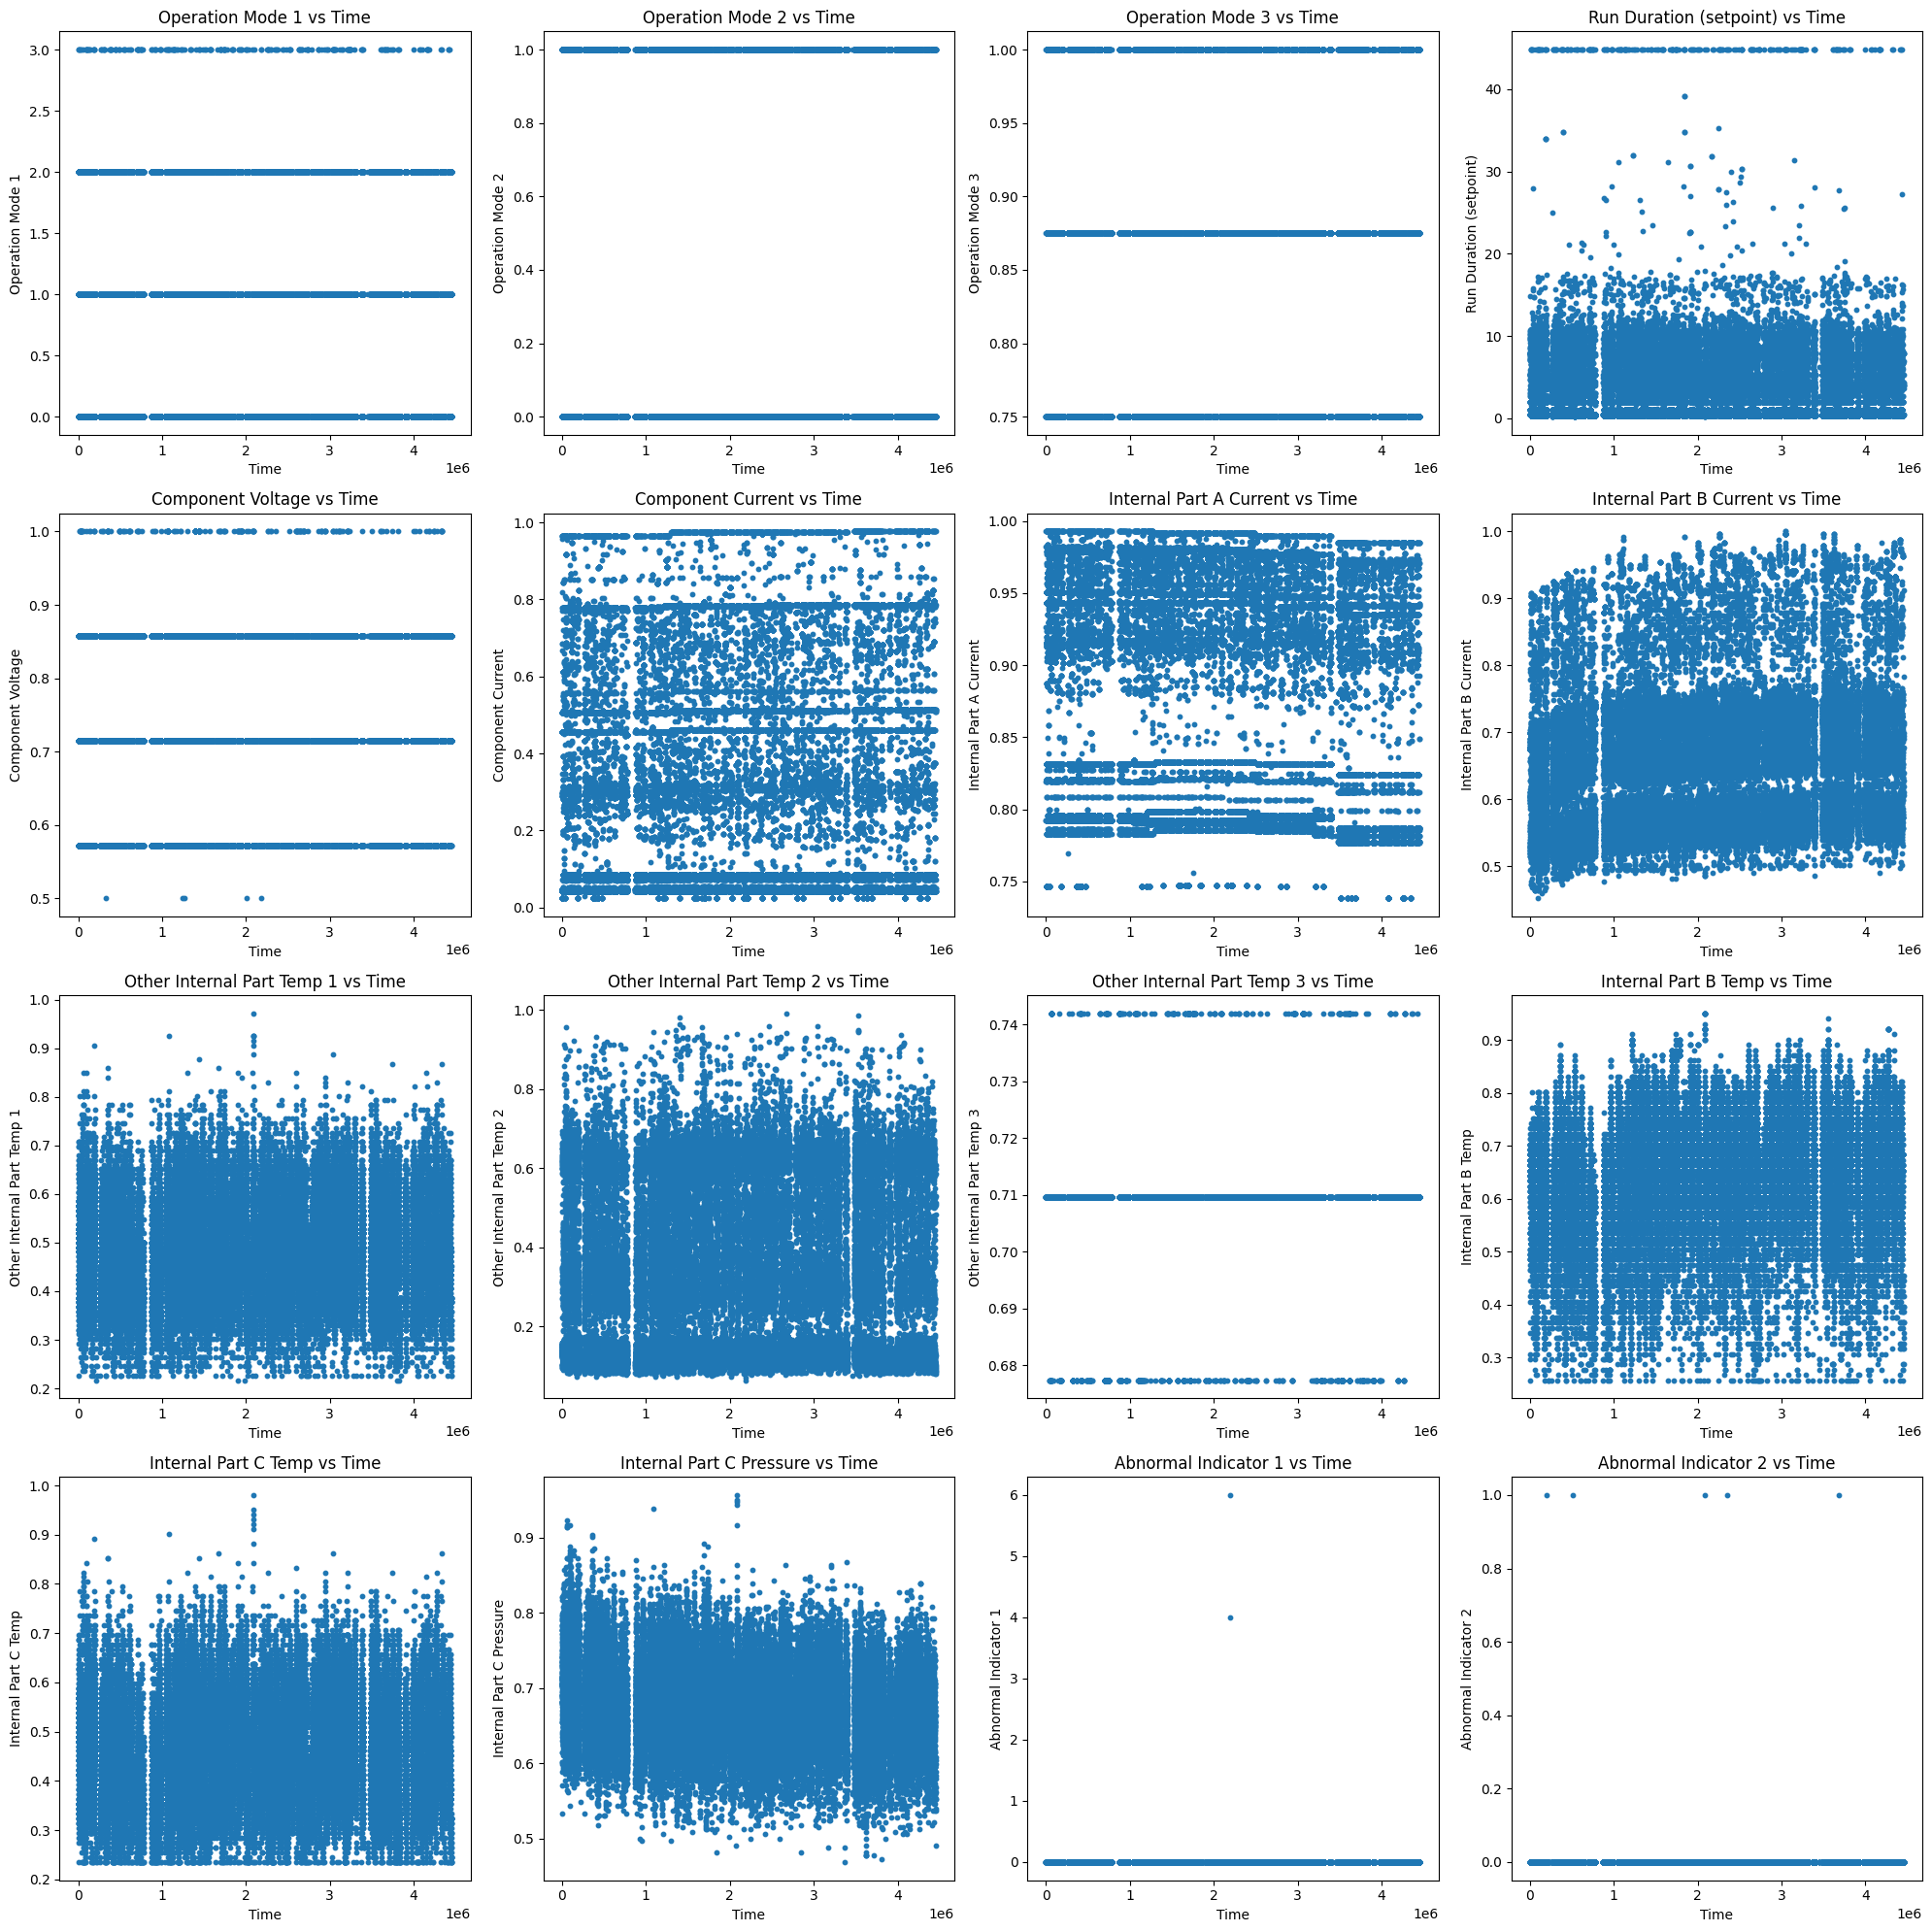

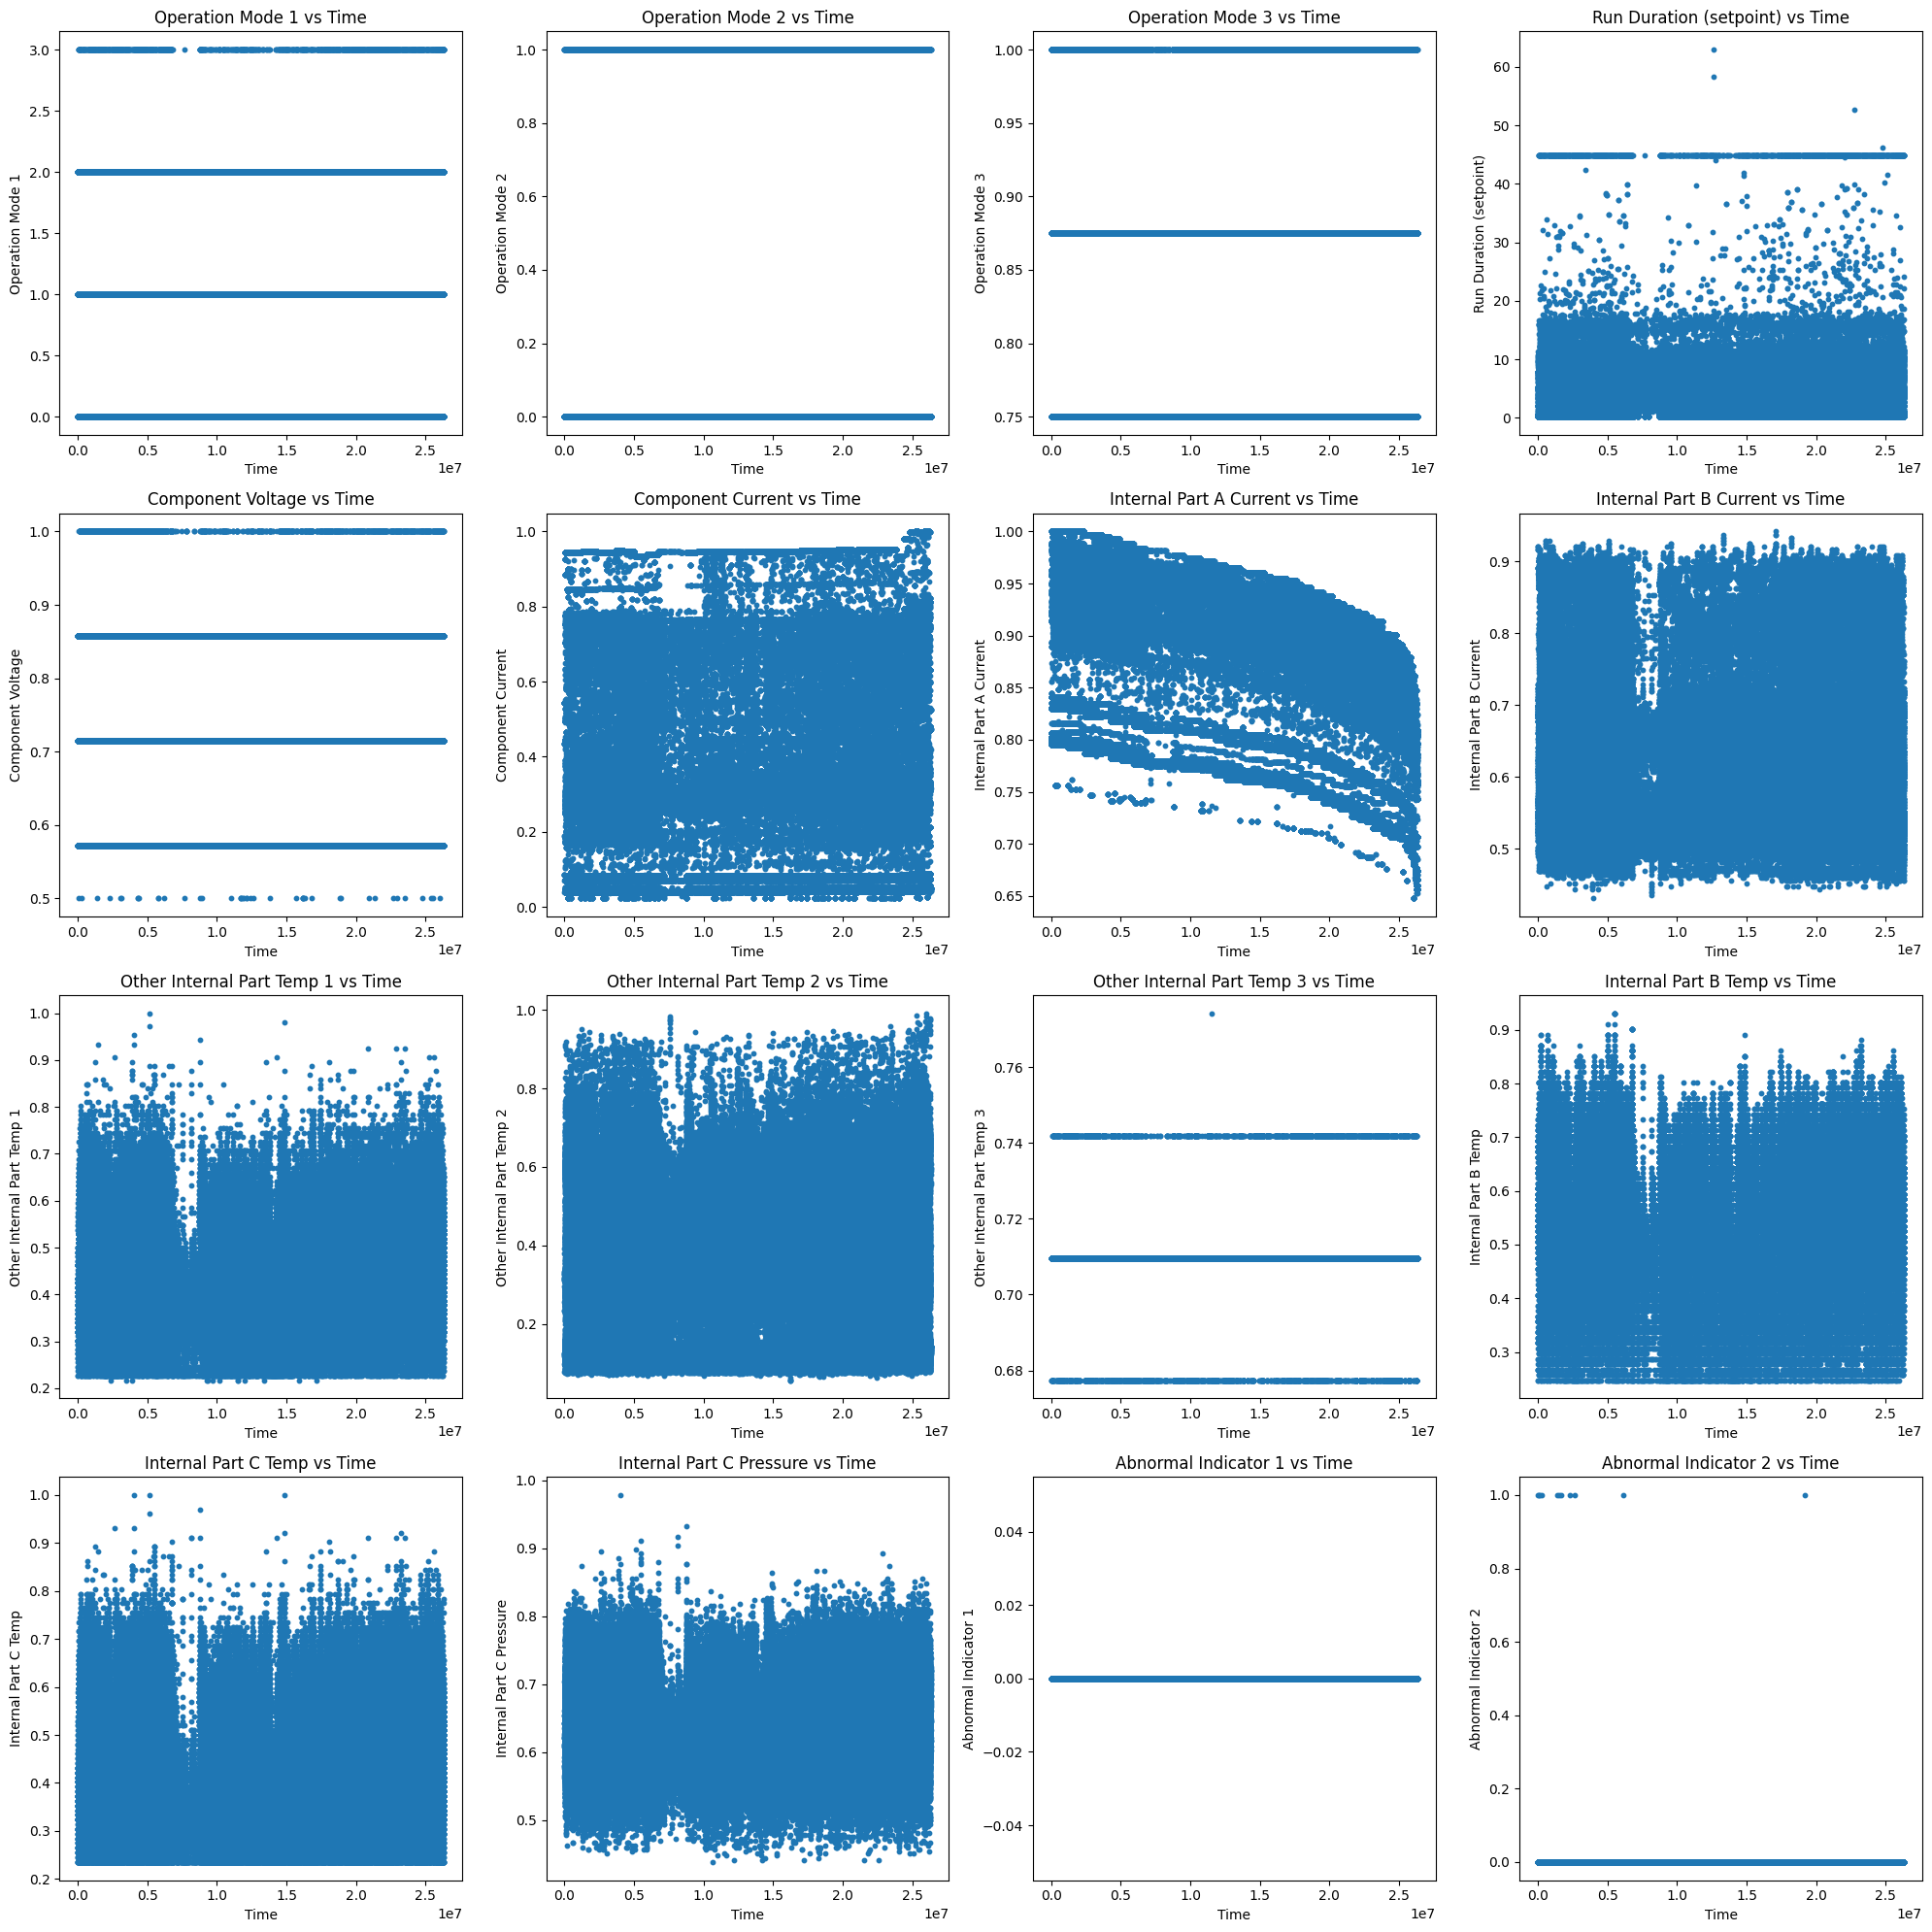

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define an English name mapping for f1–f18
feature_names = {
    'f1':  'Time',
    'f2':  'Sample Count',
    'f3':  'Operation Mode 1',
    'f4':  'Operation Mode 2',
    'f5':  'Operation Mode 3',
    'f6':  'Run Duration (setpoint)',
    'f7':  'Component Voltage',
    'f8':  'Component Current',
    'f9':  'Internal Part A Current',
    'f10': 'Internal Part B Current',
    'f11': 'Other Internal Part Temp 1',
    'f12': 'Other Internal Part Temp 2',
    'f13': 'Other Internal Part Temp 3',
    'f14': 'Internal Part B Temp',
    'f15': 'Internal Part C Temp',
    'f16': 'Internal Part C Pressure',
    'f17': 'Abnormal Indicator 1',
    'f18': 'Abnormal Indicator 2',
}

features_to_clean = [f'f{i}' for i in range(7, 17)]

# 使用布尔索引逐个特征过滤掉 0 和负值
cleaned_tube1 = tube3.copy()

def clean_data(data, features_to_clean):
    for feat in features_to_clean:
        data = data[data[feat] > 0]
    return data


# 2. Plot f3–f18 vs. cycle (assuming cycle is in column 'f1')
def plot_features_over_cycles(data, features, cycle_col='f1'):
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))
    axes = axes.flatten()
    
    for i, feat in enumerate(features):
        ax = axes[i]
        ax.scatter(data[cycle_col], data[feat], s=10)
        ax.set_xlabel(feature_names[cycle_col])
        ax.set_ylabel(feature_names[feat])
        ax.set_title(f"{feature_names[feat]} vs {feature_names[cycle_col]}")
    
    # Hide any unused subplots
    for j in range(len(features), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('features_over_cycles.png')
    plt.show()

features = [f'f{i}' for i in range(3, 19)]
# plot_features_over_cycles(cleaned_tube1,features)



# 3. Correlation heatmap with 2‑decimal annotations and English labels
def plot_correlation_heatmap(data, label):
    plt.figure(figsize=(12, 10))
    corr = data.corr()
    # Rename rows & columns to English names
    corr.index = [feature_names.get(c, c) for c in corr.index]
    corr.columns = [feature_names.get(c, c) for c in corr.columns]
    
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'{label} – Correlation Heatmap')
    plt.savefig(f'{label}_correlation_heatmap.png')
    plt.show()

# plot_correlation_heatmap(cleaned_tube1, 'Tube1')


# 4. Boxplots for a selected subset (in English)
def plot_boxplots(data, features, label):
    plt.figure(figsize=(12, 6))
    # Rename to English
    df = data[features].rename(columns=feature_names)
    sns.boxplot(data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{label} – Boxplots')
    plt.tight_layout()
    plt.savefig(f'{label}_boxplots.png')
    plt.show()

selected_features = ['f7','f8','f9','f10','f11','f12','f13','f14','f15','f16']

tubes = [tube1, tube2, tube3, tube4, tube5]
cleaned_tubes = [clean_data(tube, features_to_clean) for tube in tubes]
for i in range(1,6):
    plot_features_over_cycles(cleaned_tubes[i-1],features)


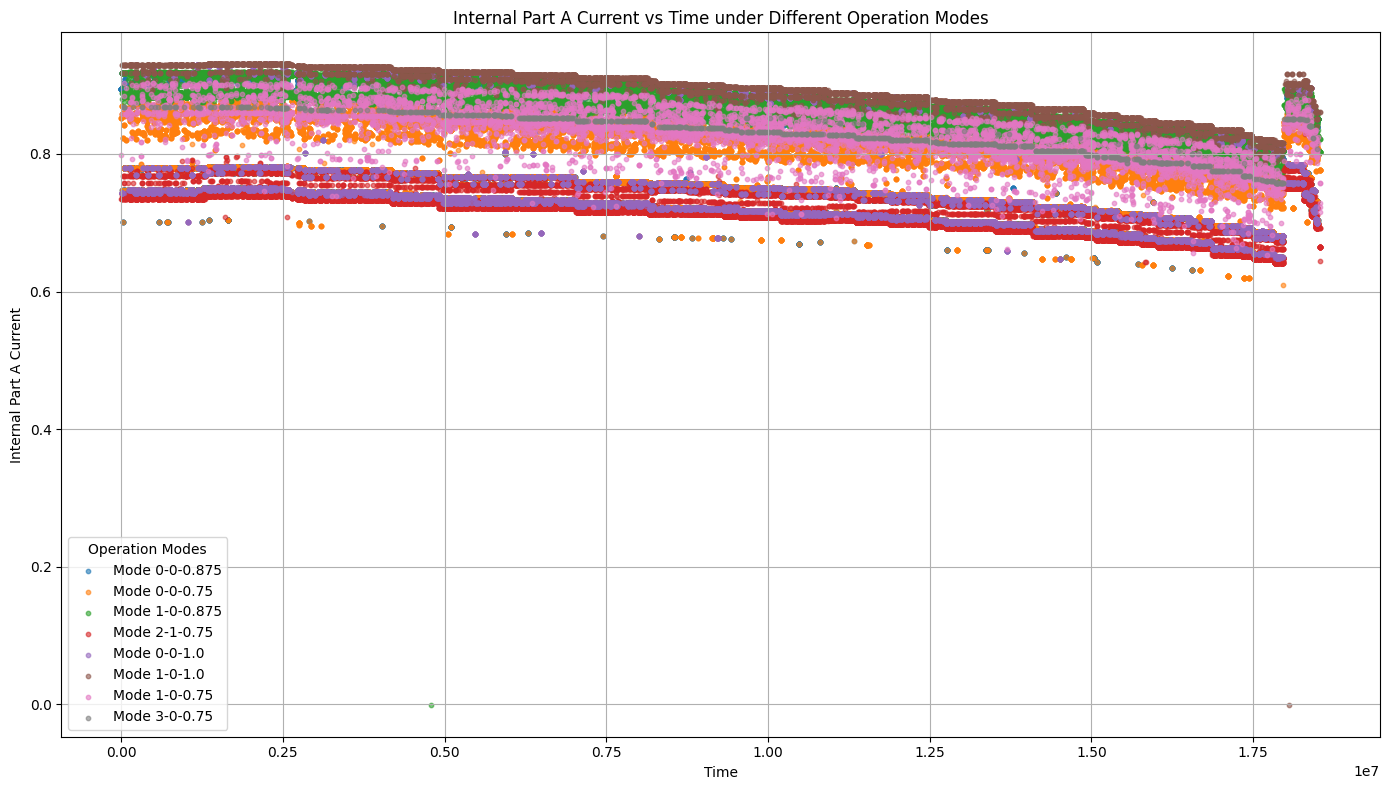

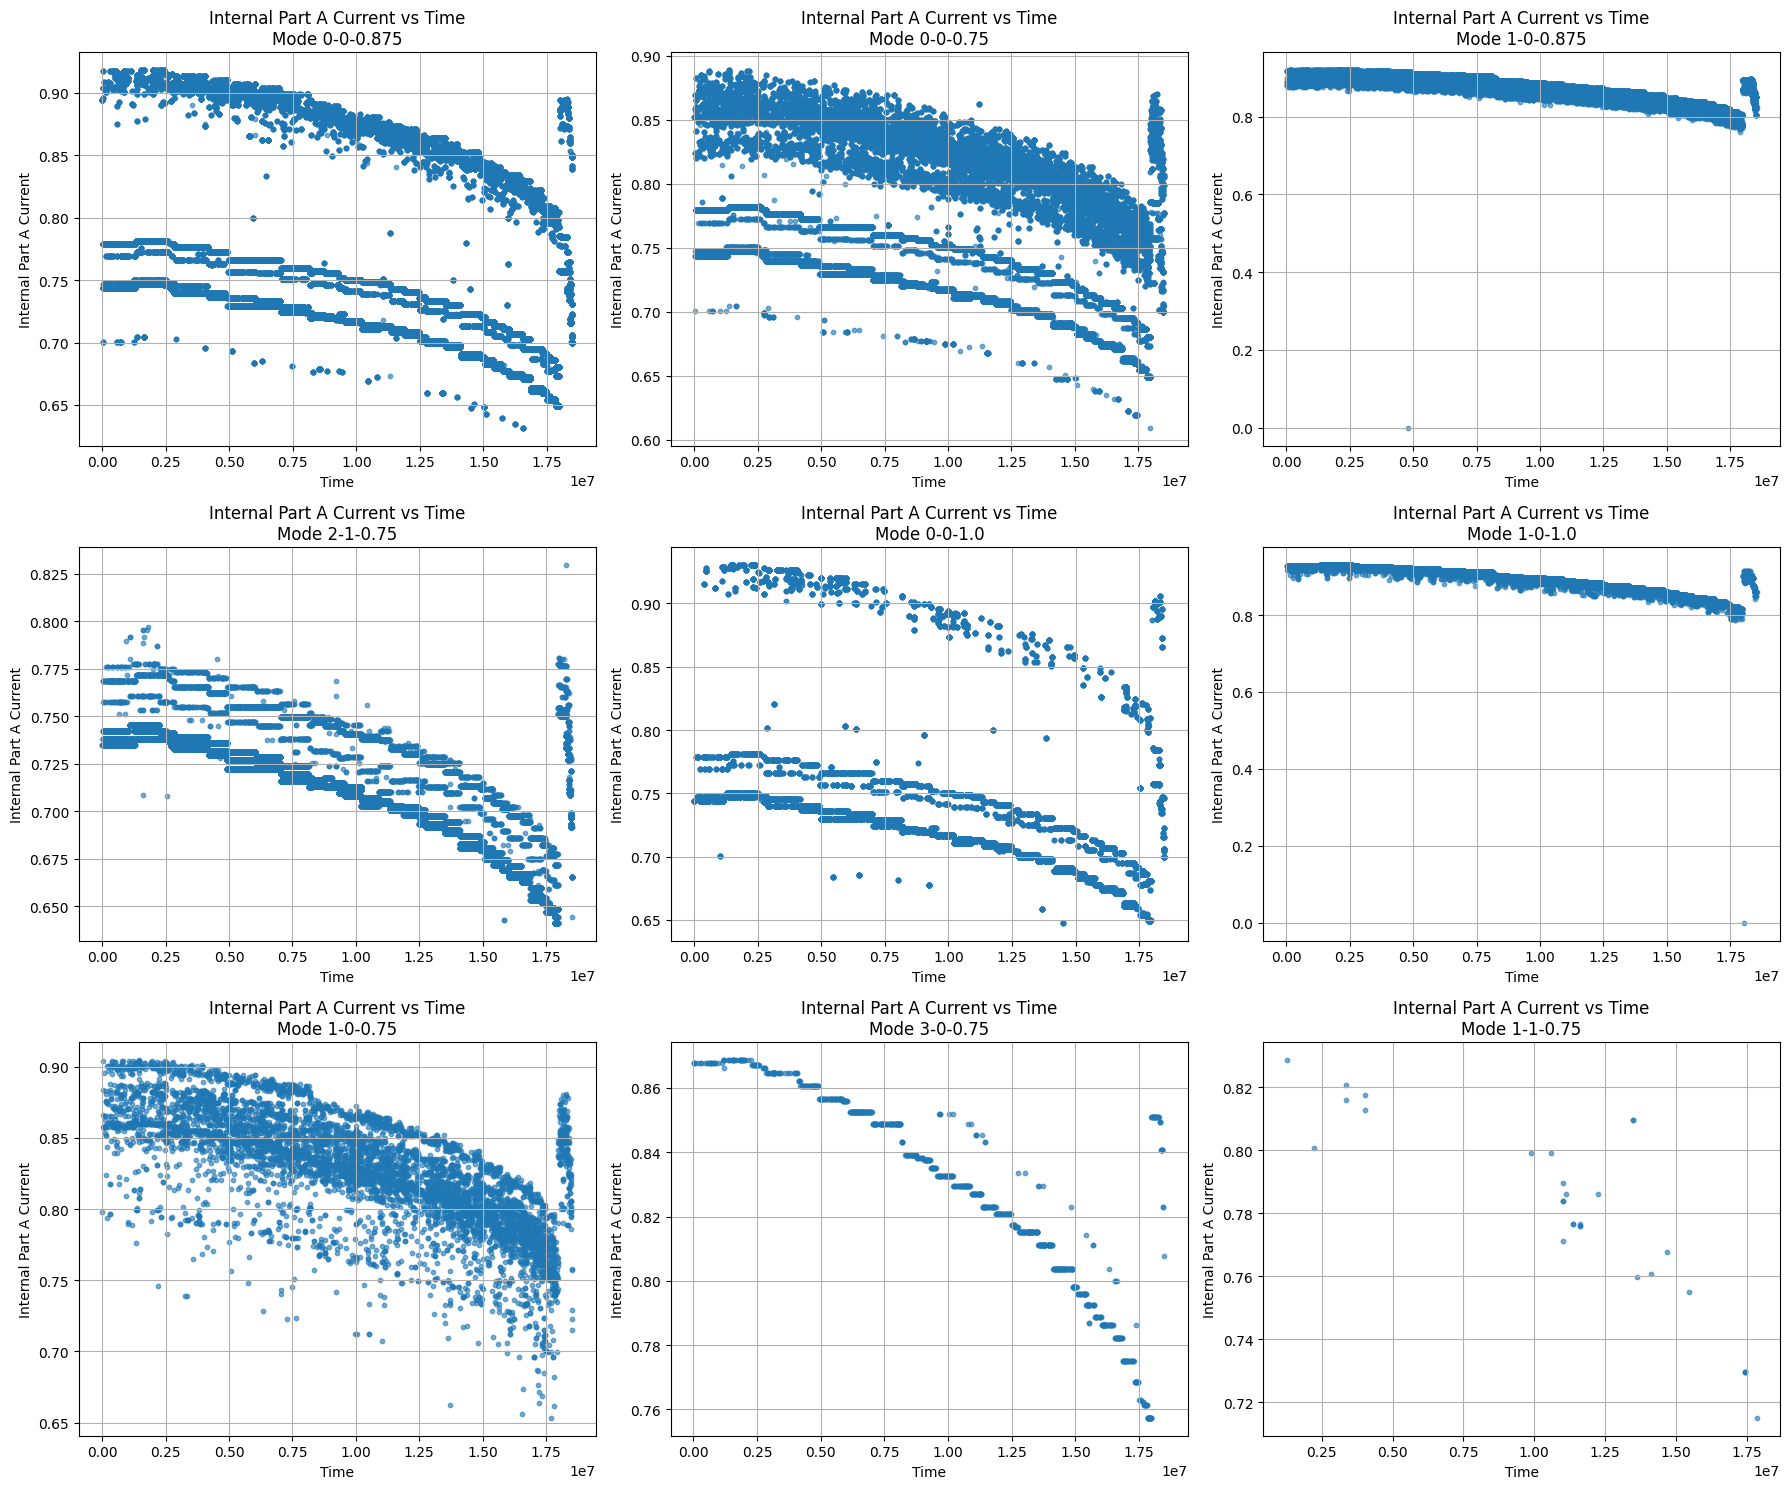

In [7]:
import matplotlib.pyplot as plt

# 添加一个表示操作模式组合的新列
cleaned_tube1['Operation Mode Combination'] = (
    cleaned_tube1['f3'].astype(str) + '-' +
    cleaned_tube1['f4'].astype(str) + '-' +
    cleaned_tube1['f5'].astype(str)
)

# 可选：筛选出现次数较多的组合，避免图太乱
mode_counts = cleaned_tube1['Operation Mode Combination'].value_counts()
top_modes = mode_counts[mode_counts > 50].index  # 只保留出现超过 50 次的组合
filtered_data = cleaned_tube1[cleaned_tube1['Operation Mode Combination'].isin(top_modes)]

# 绘图
plt.figure(figsize=(14, 8))
for mode in top_modes:
    subset = filtered_data[filtered_data['Operation Mode Combination'] == mode]
    plt.scatter(subset['f1'], subset['f9'], s=10, label=f'Mode {mode}', alpha=0.6)

plt.xlabel(feature_names['f1'])
plt.ylabel(feature_names['f9'])
plt.title('Internal Part A Current vs Time under Different Operation Modes')
plt.legend(title='Operation Modes')
plt.grid(True)
plt.tight_layout()
plt.savefig("f9_vs_cycle_by_mode.png")
plt.show()



# 创建操作模式组合列
cleaned_tube1['Operation Mode Combination'] = (
    cleaned_tube1['f3'].astype(str) + '-' +
    cleaned_tube1['f4'].astype(str) + '-' +
    cleaned_tube1['f5'].astype(str)
)

# 选出频次最多的前 9 个模式组合
top_modes = cleaned_tube1['Operation Mode Combination'].value_counts().nlargest(9).index
filtered_data = cleaned_tube1[cleaned_tube1['Operation Mode Combination'].isin(top_modes)]

# 创建子图
n = len(top_modes)
rows = (n + 2) // 3  # 每行最多 3 个子图
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

# 绘图
for i, mode in enumerate(top_modes):
    ax = axes[i]
    subset = filtered_data[filtered_data['Operation Mode Combination'] == mode]
    ax.scatter(subset['f1'], subset['f9'], s=10, alpha=0.6)
    ax.set_title(f'Internal Part A Current vs Time\nMode {mode}')
    ax.set_xlabel(feature_names['f1'])
    ax.set_ylabel(feature_names['f9'])
    ax.grid(True)

# 隐藏多余子图
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig("f9_vs_time_by_modes_subplots.png")
plt.show()



异常样本总数: 6413.0
异常占比: 3.55%


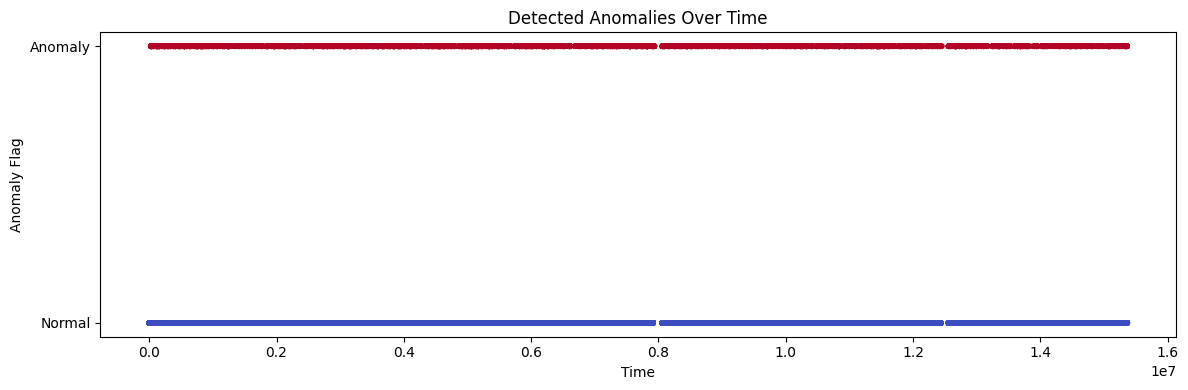

In [29]:
import numpy as np
import pandas as pd

def detect_anomalies_iqr(data, features, threshold=1.5):
    anomalies = pd.DataFrame(False, index=data.index, columns=features)
    for feat in features:
        Q1 = data[feat].quantile(0.25)
        Q3 = data[feat].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        anomalies[feat] = (data[feat] < lower_bound) | (data[feat] > upper_bound)
    
    # 按行统计是否有至少一个异常
    anomaly_flags = anomalies.any(axis=1)
    return anomaly_flags, anomalies

# 对 f7–f16 特征进行检测
anomaly_features = [f'f{i}' for i in range(7, 17)]
anomaly_flags, anomaly_detail = detect_anomalies_iqr(cleaned_tube1, anomaly_features)

# 添加结果列
tube1['anomaly'] = anomaly_flags.astype(int)

print("异常样本总数:", tube1['anomaly'].sum())
print("异常占比: {:.2f}%".format(tube1['anomaly'].mean() * 100))

# 可视化异常点在时间轴上的分布 
plt.figure(figsize=(12, 4))
plt.scatter(tube1['f1'], tube1['anomaly'], c=tube1['anomaly'], cmap='coolwarm', s=10)
plt.xlabel(feature_names['f1'])
plt.ylabel('Anomaly Flag')
plt.title('Detected Anomalies Over Time')
plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()


/var/folders/4q/5v3lvzwn7ws7vfwrsl5zb96m0000gn/T/ipykernel_58987/3495202335.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['anomaly'] = anomaly_flags.astype(int)


时序特征下的异常样本数: 111003


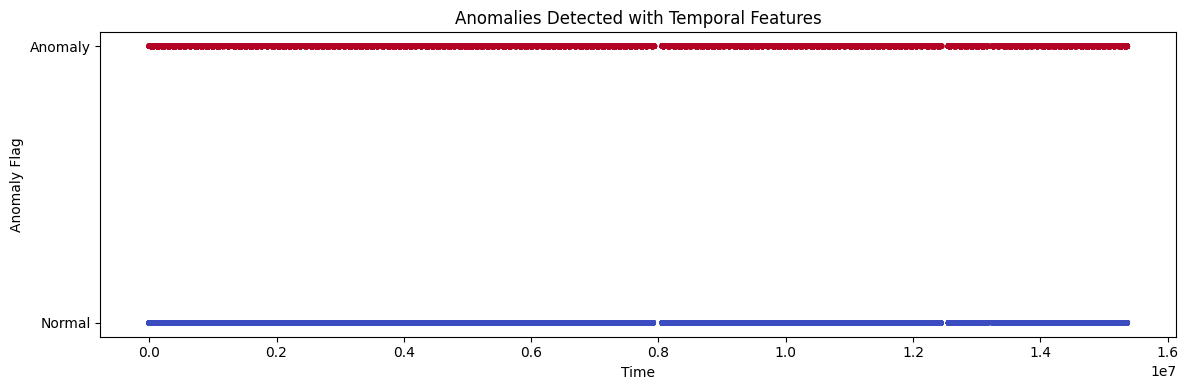

In [30]:
def add_temporal_features(data, features, window=5):
    df = data.copy()
    for feat in features:
        df[f'{feat}_mean'] = df[feat].rolling(window=window, center=True).mean()
        df[f'{feat}_std'] = df[feat].rolling(window=window, center=True).std()
        df[f'{feat}_diff'] = df[feat].diff()
        df[f'{feat}_pct'] = df[feat].pct_change()
    return df

def detect_anomalies_with_temporal_features(data, features, window=5, threshold=1.5):
    df = add_temporal_features(data, features, window)
    
    # 所有新增的时序列名
    temporal_features = [f"{f}_{suffix}" for f in features for suffix in ['mean', 'std', 'diff', 'pct']]
    df_clean = df.dropna(subset=temporal_features)  # 去掉前几个NaN窗口

    # 检测异常
    anomaly_flags, _ = detect_anomalies_iqr(df_clean, temporal_features, threshold)

    df_clean['anomaly'] = anomaly_flags.astype(int)
    return df_clean


anomaly_features = [f'f{i}' for i in range(7, 17)]
df_anomaly_result = detect_anomalies_with_temporal_features(tube1, anomaly_features, window=5)

print("时序特征下的异常样本数:", df_anomaly_result['anomaly'].sum())


plt.figure(figsize=(12, 4))
plt.scatter(df_anomaly_result['f1'], df_anomaly_result['anomaly'], 
            c=df_anomaly_result['anomaly'], cmap='coolwarm', s=10)
plt.xlabel(feature_names['f1'])
plt.ylabel('Anomaly Flag')
plt.title('Anomalies Detected with Temporal Features')
plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def add_temporal_features(data, features, window=5):
    df = data.copy()
    for feat in features:
        df[f'{feat}_mean'] = df[feat].rolling(window=window, center=True).mean()
        df[f'{feat}_std'] = df[feat].rolling(window=window, center=True).std()
        df[f'{feat}_diff'] = df[feat].diff()
        df[f'{feat}_pct'] = df[feat].pct_change()
    return df


class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=8):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


def train_autoencoder(model, dataloader, epochs=50, lr=1e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()
    model.train()

    for epoch in range(epochs):
        for batch in dataloader:
            x = batch[0]
            optimizer.zero_grad()
            output = model(x)
            loss = criterion(output, x)
            loss.backward()
            optimizer.step()
    return model


def autoencoder_anomaly_detection_pytorch(df, features, window=5, threshold_percentile=95, batch_size=32):
    df_ts = add_temporal_features(df, features, window).dropna().reset_index(drop=True)
    temporal_feats = [f"{f}_{sfx}" for f in features for sfx in ['mean', 'std', 'diff', 'pct']]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_ts[temporal_feats])
    
    # PyTorch数据准备
    X_tensor = torch.tensor(X_scaled, dtype=torch.float64)
    dataset = TensorDataset(X_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # 模型训练
    model = AutoEncoder(input_dim=X_scaled.shape[1])
    model = train_autoencoder(model, dataloader)

    # 预测 & 重构误差
    model.eval()
    with torch.no_grad():
        recon = model(X_tensor)
        mse = ((X_tensor - recon) ** 2).mean(dim=1).numpy()

    # 异常判定
    threshold = np.percentile(mse, threshold_percentile)
    df_ts['reconstruction_error'] = mse
    df_ts['anomaly'] = (mse > threshold).astype(int)
    
    return df_ts, model, threshold

anomaly_features = [f'f{i}' for i in range(7, 17)]
df_detected, model, threshold = autoencoder_anomaly_detection_pytorch(tube4, anomaly_features)

print("检测到异常数量:", df_detected['anomaly'].sum())

plt.figure(figsize=(12, 4))
plt.scatter(df_detected['f1'], df_detected['anomaly'], 
            c=df_detected['anomaly'], cmap='coolwarm', s=10)
plt.xlabel('Time')
plt.ylabel('Anomaly')
plt.title('Anomaly Detection (AutoEncoder, PyTorch)')
plt.yticks([0, 1], ['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()



ValueError: Input X contains infinity or a value too large for dtype('float64').

检测到异常数量： 1806
异常占比：1.00%


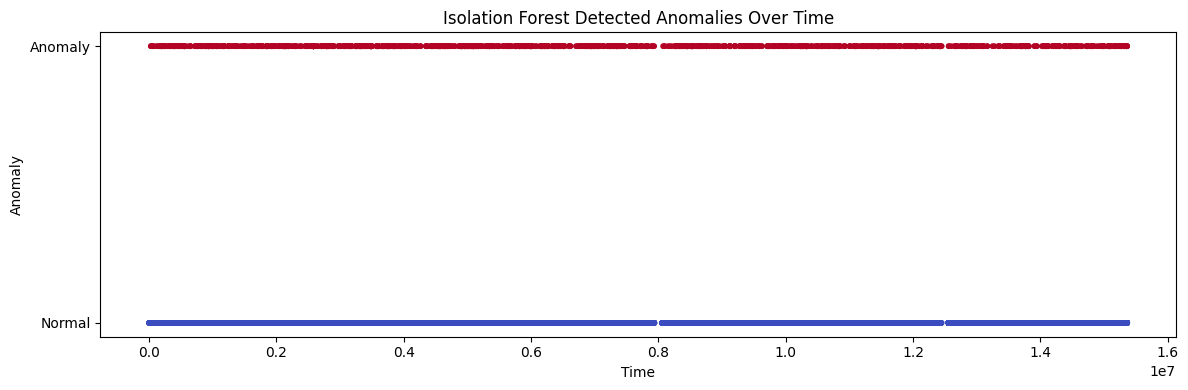

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. 时序特征提取（已做清洗：去除 inf/nan）
def add_temporal_features(data, features, window=5):
    df = data.copy()
    for feat in features:
        df[f'{feat}_mean'] = df[feat].rolling(window=window, center=True).mean()
        df[f'{feat}_std']  = df[feat].rolling(window=window, center=True).std()
        df[f'{feat}_diff'] = df[feat].diff()
        df[f'{feat}_pct']  = df[feat].pct_change()
    # 清理 inf / -inf，再丢弃所有 NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    return df.dropna().reset_index(drop=True)

# 2. Isolation Forest 异常检测封装
def isolation_forest_anomaly_detection(
    df, 
    features, 
    window=5, 
    contamination=0.01,     # 异常点比例假设
    random_state=42
):
    # 提取时序特征
    df_ts = add_temporal_features(df, features, window)
    
    # 构造特征矩阵
    temporal_feats = [
        f"{f}_{sfx}" 
        for f in features 
        for sfx in ('mean','std','diff','pct')
    ]
    
    # 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_ts[temporal_feats])
    
    # 训练 IsolationForest
    iso = IsolationForest(
        contamination=contamination,
        random_state=random_state,
        n_jobs=-1
    )
    iso.fit(X_scaled)
    
    # 得到 anomaly score（越低越可疑），和最终 label
    scores = iso.decision_function(X_scaled)
    labels = iso.predict(X_scaled)  # 1 = 正常, -1 = 异常

    # 合并回 DataFrame
    df_ts['anomaly_score'] = scores
    df_ts['anomaly'] = (labels == -1).astype(int)
    
    return df_ts, temporal_feats

# 3. 使用示例
temp3 = cleaned_tube1['f14']
anomaly_features = [f'f{i}' for i in range(7, 17)]
df_iforest, feat_cols = isolation_forest_anomaly_detection(
    cleaned_tube1, 
    anomaly_features, 
    window=30, 
    contamination=0.01  # 假设 “最坏” 3% 样本为异常
)

print("检测到异常数量：", df_iforest['anomaly'].sum())
print("异常占比：{:.2f}%".format(df_iforest['anomaly'].mean() * 100))

# 4. 可视化（时间 vs. 异常）
plt.figure(figsize=(12, 4))
plt.scatter(
    df_iforest['f1'], 
    df_iforest['anomaly'], 
    c=df_iforest['anomaly'], 
    cmap='coolwarm', 
    s=10
)
plt.xlabel('Time')
plt.ylabel('Anomaly')
plt.yticks([0,1], ['Normal','Anomaly'])
plt.title('Isolation Forest Detected Anomalies Over Time')
plt.tight_layout()
plt.show()

混淆矩阵:
 [[178758   1805]
 [    10      1]]

分类报告:
              precision    recall  f1-score   support

          正常       1.00      0.99      0.99    180563
          异常       0.00      0.09      0.00        11

    accuracy                           0.99    180574
   macro avg       0.50      0.54      0.50    180574
weighted avg       1.00      0.99      0.99    180574

ROC AUC: 0.1723
PR AUC: 0.0000


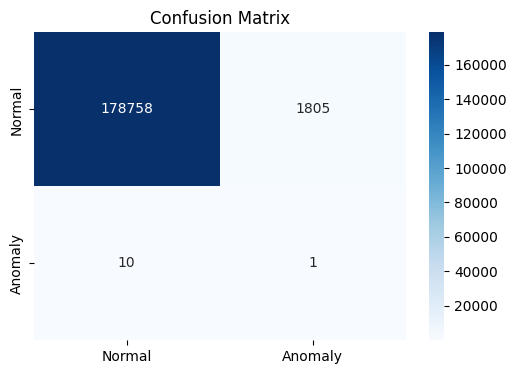

/var/folders/4q/5v3lvzwn7ws7vfwrsl5zb96m0000gn/T/ipykernel_58987/515894651.py:56: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4q/5v3lvzwn7ws7vfwrsl5zb96m0000gn/T/ipykernel_58987/515894651.py:56: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ML/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


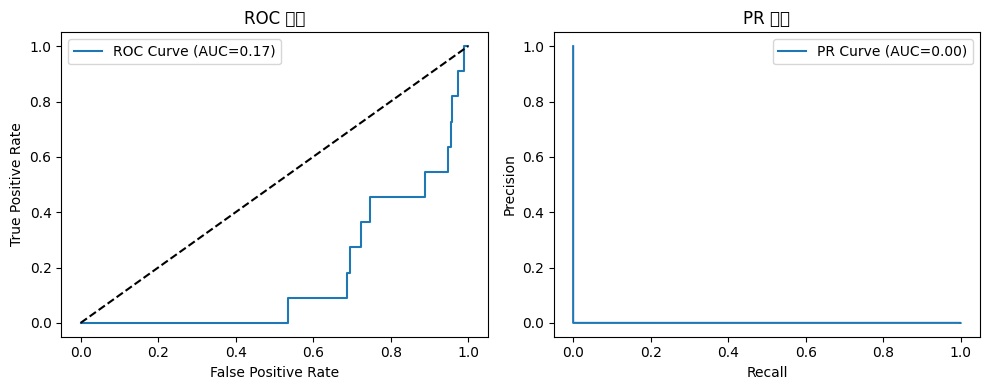

In [41]:
y_true = df_iforest['f18'].copy()
y_true = np.where(y_true != 0, 1, y_true).astype(int)         # 真实标签（0=正常，1=异常）
y_pred = df_iforest['anomaly']     # 预测标签（0=正常，1=异常）
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_auc_score,
    precision_recall_curve,
    auc
)

# 混淆矩阵
cm = confusion_matrix(y_true, y_pred)
print("混淆矩阵:\n", cm)

# 分类报告（精确率、召回率、F1等）
print("\n分类报告:")
print(classification_report(y_true, y_pred, target_names=["正常", "异常"]))

# ROC AUC（需概率值，此处用异常分数代替）
roc_auc = roc_auc_score(y_true, df_iforest['anomaly_score'])
print(f"ROC AUC: {roc_auc:.4f}")

# PR AUC（更适用于类别不平衡场景）
precision, recall, _ = precision_recall_curve(y_true, df_iforest['anomaly_score'])
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve

# ROC 曲线
fpr, tpr, _ = roc_curve(y_true, df_iforest['anomaly_score'])
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 曲线')
plt.legend()

# PR 曲线
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'PR Curve (AUC={pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR 曲线')
plt.legend()
plt.tight_layout()
plt.show()

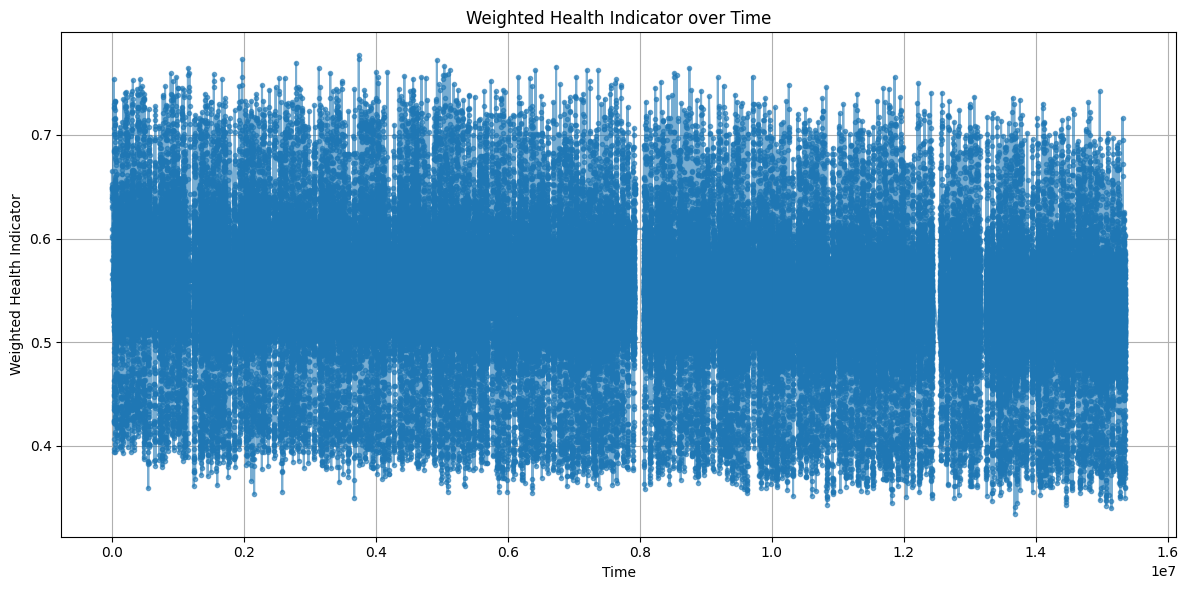

In [38]:
voltage_features = ['f7']                  # 电压
current_features = ['f8', 'f9', 'f10']     # 电流
temp_features = ['f11', 'f12', 'f13', 'f14', 'f15']  # 温度（越高越不健康）
pressure_features = ['f16']               # 压力（中性或略偏负相关）

weights = {
    'voltage': 0.2,
    'current': 0.3,
    'temperature': 0.4,
    'pressure': 0.1
}

from sklearn.preprocessing import MinMaxScaler
import numpy as np

def compute_weighted_health_indicator(data):
    df = data.copy()
    
    # 定义特征分组
    voltage_features = ['f7']
    current_features = ['f8', 'f9', 'f10']
    temp_features = ['f11', 'f12', 'f13', 'f14', 'f15']
    pressure_features = ['f16']
    
    all_features = voltage_features + current_features + temp_features + pressure_features

    # 清洗数据（去除 <=0）
    for feat in all_features:
        df = df[df[feat] > 0]

    # 归一化
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[all_features])
    scaled_df = pd.DataFrame(scaled, columns=all_features, index=df.index)
    
    # 温度指标反转（越低越健康 → 越高越归一化值越低 → 用 1 - norm_val）
    for feat in temp_features:
        scaled_df[feat] = 1 - scaled_df[feat]

    # 计算各类得分
    voltage_score = scaled_df[voltage_features].mean(axis=1)
    current_score = scaled_df[current_features].mean(axis=1)
    temp_score = scaled_df[temp_features].mean(axis=1)
    pressure_score = scaled_df[pressure_features].mean(axis=1)

    # 加权平均
    df['Health_Indicator'] = (
        0.2 * voltage_score +
        0.3 * current_score +
        0.4 * temp_score +
        0.1 * pressure_score
    )
    
    return df

hi_weighted_data = compute_weighted_health_indicator(tube1)

plt.figure(figsize=(12, 6))
plt.plot(hi_weighted_data['f1'], hi_weighted_data['Health_Indicator'], marker='.', alpha=0.6)
plt.xlabel(feature_names['f1'])
plt.ylabel('Weighted Health Indicator')
plt.title('Weighted Health Indicator over Time')
plt.grid(True)
plt.tight_layout()
plt.savefig('weighted_health_indicator.png')
plt.show()


MAE: 1532921.65
R²: 0.71


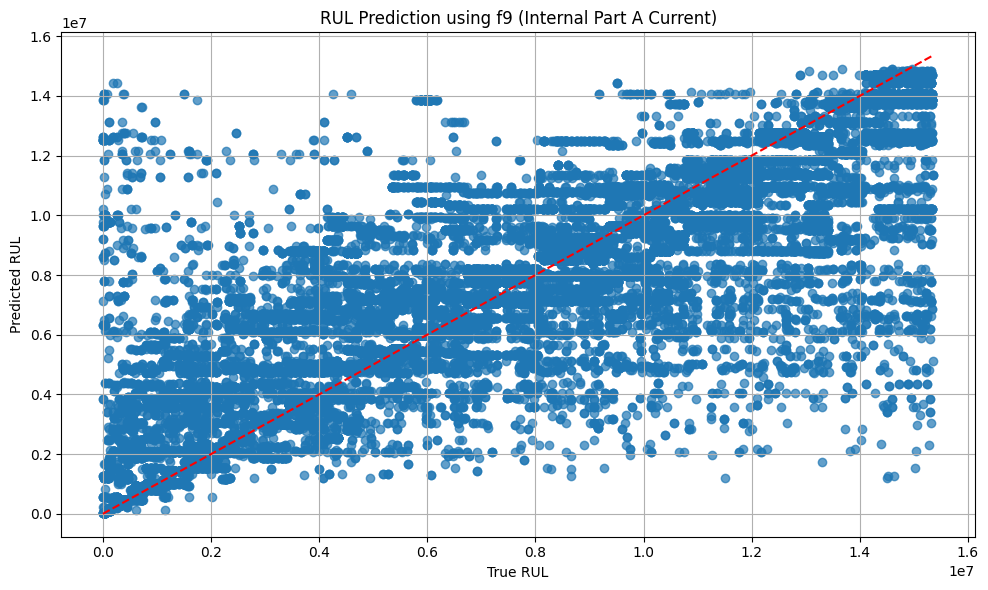

In [39]:
def add_rul_label(df, time_col='f1'):
    df = df.copy()
    df = df.sort_values(by=time_col).reset_index(drop=True)
    max_cycle = df[time_col].max()
    df['RUL'] = max_cycle - df[time_col]
    return df

df_rul = add_rul_label(tube1)
X = df_rul[['f9']]  # 特征
y = df_rul['RUL']   # 标签


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 拆分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型训练
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("RUL Prediction using f9 (Internal Part A Current)")
plt.grid(True)
plt.tight_layout()
plt.savefig("f9_rul_prediction.png")
plt.show()
